# СОЗДАНИЕ МОДЕЛЕЙ 

In [92]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats 
import seaborn as sns

import sklearn
from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, SGDRegressor, ARDRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer, OrdinalEncoder, PolynomialFeatures
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import plotly.express as px
from scipy import stats
from scipy.stats import ttest_ind
import pickle
import io

%matplotlib inline

In [101]:
# загрузка и просмотр датасета
#df = pd.read_excel('../data/processed/df.xlsx', index_col=0)
#df = pd.read_excel('../data/processed/df_clean.xlsx', index_col=0)
df = pd.read_excel('../data/processed/df_prep.xlsx', index_col=0)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Угол нашивки, град                    922 non-null    int64  
 11  Шаг нашивки       

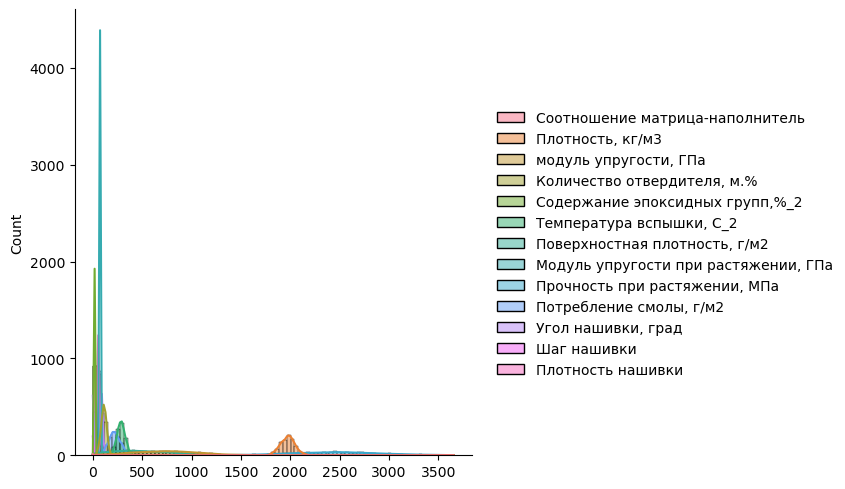

In [95]:
fig = sns.displot(df, kde=True)

# Модуль упругости при растяжении и Прочность при растяжении

In [102]:
# Выделение целевых переменных и разделение на тренировочную и тестовую части
X_Emod = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
y_Emod = df['Модуль упругости при растяжении, ГПа']

X_Rm = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_Rm = df['Прочность при растяжении, МПа']

In [103]:
X_Emod_train, X_Emod_test, y_Emod_train, y_Emod_test = train_test_split(X_Emod, y_Emod, test_size = 0.3, random_state=42)
print(X_Emod_train.shape, X_Emod_test.shape)
print(y_Emod_train.shape, y_Emod_test.shape)

X_Rm_train, X_Rm_test, y_Rm_train, y_Rm_test = train_test_split(X_Rm, y_Rm, test_size = 0.3, random_state=42)
print(X_Rm_train.shape, X_Rm_test.shape)
print(y_Rm_train.shape, y_Rm_test.shape)


(716, 12) (307, 12)
(716,) (307,)
(716, 12) (307, 12)
(716,) (307,)


In [ ]:
#Описание используемых методов
#В данном разделе приводится краткое описание методов (не более 1 страницы на каждый), 
#которые предполагается использовать для решения поставленной задачи. 
#Необходимо обратить особое внимание на достоинства, недостатки и области применения каждого из методов. 
#Кроме того, желательно составление итоговой сравнительной таблицы с указанием среди прочего 
#априорных предпосылок к работоспособности каждого метода.

#Обучить алгоритм машинного обучения, который будет определять значения:
#-	Модуль упругости при растяжении, ГПа
#-	Прочность при растяжении, МПа
#4)	Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. 
#При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
#При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, 
#количество блоков равно 10.

#Линейная регрессия
#SVM (метод опорных векторов)
#KNN (метод k-ближайших соседей)
#Дерево решений
#Random Forest
#Наивный байесовский классификатор
#AdaBoost, или адаптивный бустинг
#Gradient Boost и XGBoost
#LightGBM
#Нейросетевая регрессия
#Регрессия LASSO
#Гребневая регрессия (ридж-регрессия)
#Регрессия ElasticNet



In [ ]:
# Поиск лучших гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10
n_estimators = [3,5,9,11]
max_depth = [1,2,3,4,5]
min_samples_split = [10,20,30]
min_samples_leaf = [2,4,6]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfr, param_grid, cv = 10, verbose = 1, n_jobs=1)
gs.fit(X_train, y_train)
gs.best_params_



parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 12],
    'min_samples_split': [2, 6, 10],
}
roc_auc_ovr = make_scorer(roc_auc_score, multi_class='ovr')

clf = GridSearchCV(
    RandomForestClassifier(), parameters, cv=5, scoring=roc_auc_ovr
)

clf.fit(x_train, y_train)

print(f'Лучшие параметры: {clf.best_params_}')

best_r_tree = clf.best_estimator_

In [98]:
#Какую модель использовать? Нужно попробовать разные. Для сравнения моделей использую несколько метрик. Для статистической устойчивости результатов использую кросс-валидацию. Оформлю запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.
#

# запуск разных моделей и оценка метрик
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=42)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

#Для поиска параметров по сетке тоже сделаю вспомогательную функцию, чтобы везде использовалась одинаковые параметры и одинаково выводился результат.
#
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=42)
    # scoring = 'neg_root_mean_squared_error'
    scoring = 'neg_mean_absolute_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'MAE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat, searcher.best_estimator_

#И еще одна вспомогательная функция для получения метрик предсказания.
#
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

#Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn.
#

In [104]:
models_Emodulus = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

stat_Emodulus = run_models(models_Emodulus, X_Emod_train, y_Emod_train)
stat_Emodulus.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.018492,-3.092476,-2.483579,-0.033979,-7.663604
LinearRegression,-0.035792,-3.117282,-2.510271,-0.034355,-7.514379
Ridge,-0.035784,-3.117271,-2.510265,-0.034355,-7.514262
Lasso,-0.025599,-3.103396,-2.493455,-0.034119,-7.527861
SVR,-0.030644,-3.112145,-2.502628,-0.034185,-7.793296
SGDRegressor,-2781134820455966671784722300928.000000,-4494476797850637.500000,-4367450469760170.500000,-59767855266774.953125,-7030578181823276.000000
KNeighborsRegressor,-0.208214,-3.360445,-2.690198,-0.036807,-8.668973
DecisionTreeRegressor,-1.305589,-4.608021,-3.677640,-0.050327,-11.924953
RandomForestRegressor,-0.065067,-3.161912,-2.532810,-0.034657,-7.811542


In [99]:
models_Emodulus = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

stat_Emodulus = run_models(models_Emodulus, X_Emod_train, y_Emod_train)
stat_Emodulus.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.005978,-2.959776,-2.391135,-0.032699,-7.233665
LinearRegression,-0.026962,-2.989545,-2.427342,-0.033198,-7.317447
Ridge,-0.026954,-2.989533,-2.427335,-0.033198,-7.317366
Lasso,-0.018605,-2.977458,-2.408163,-0.032938,-7.297062
SVR,-0.021273,-2.981150,-2.415894,-0.033018,-7.305195
SGDRegressor,-1905773438595066706432003932160.000000,-3619564957314887.000000,-3518418185794848.000000,-48139230551253.648438,-5341388001632719.000000
KNeighborsRegressor,-0.172842,-3.194092,-2.534390,-0.034709,-8.568040
DecisionTreeRegressor,-1.168993,-4.317808,-3.488211,-0.047685,-10.925454
RandomForestRegressor,-0.079904,-3.065513,-2.482951,-0.033967,-7.476743


In [90]:
models_Emodulus = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

stat_Emodulus = run_models(models_Emodulus, X_Emod_train, y_Emod_train)
stat_Emodulus.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.005978,-0.192077,-0.155175,-3347840459317.124023,-0.469435
LinearRegression,-0.026962,-0.194009,-0.157524,-3683937634430.865723,-0.474872
Ridge,-0.025137,-0.193842,-0.157360,-3666438338536.077148,-0.474475
Lasso,-0.005978,-0.192077,-0.155175,-3347840459317.124023,-0.469435
SVR,-0.260346,-0.214443,-0.171644,-2880652826513.149414,-0.530305
SGDRegressor,-0.038863,-0.195018,-0.157281,-3688337893360.049805,-0.477417
KNeighborsRegressor,-0.215760,-0.211106,-0.171461,-3165907589948.367188,-0.530524
DecisionTreeRegressor,-1.157739,-0.280421,-0.226275,-2381703342533.636230,-0.715184
RandomForestRegressor,-0.077519,-0.198720,-0.161142,-3835610599652.521973,-0.481209


In [91]:
models_Rm = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

stat_Rm = run_models(models_Rm, X_Rm_train, y_Rm_train)
stat_Rm.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.008783,-0.186579,-0.149120,-0.693187,-0.467456
LinearRegression,-0.038337,-0.189316,-0.151587,-0.691962,-0.470897
Ridge,-0.036112,-0.189113,-0.151400,-0.691830,-0.470655
Lasso,-0.008783,-0.186579,-0.149120,-0.693187,-0.467456
SVR,-0.226356,-0.205477,-0.163493,-0.746035,-0.525318
SGDRegressor,-0.108385,-0.195252,-0.157282,-0.723075,-0.495832
KNeighborsRegressor,-0.186228,-0.202158,-0.159284,-0.737835,-0.527324
DecisionTreeRegressor,-1.079926,-0.267110,-0.217158,-0.836105,-0.654926
RandomForestRegressor,-0.056142,-0.190987,-0.153408,-0.702645,-0.471329


In [100]:
models_Rm = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

stat_Rm = run_models(models_Rm, X_Rm_train, y_Rm_train)
stat_Rm.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.008783,-448.544529,-358.490113,-0.155329,-1123.784590
LinearRegression,-0.038337,-455.122689,-364.421774,-0.157442,-1132.056433
Ridge,-0.038324,-455.119662,-364.419857,-0.157442,-1132.036077
Lasso,-0.038081,-455.063599,-364.388563,-0.157432,-1131.492206
SVR,-0.008748,-448.534550,-358.756869,-0.155293,-1123.314337
SGDRegressor,-29660389303779774609489920.000000,-2271967538236749.500000,-2183649950434797.250000,-917800639149.063721,-3483465991322129.500000
KNeighborsRegressor,-0.172973,-483.451135,-390.480480,-0.167432,-1228.810648
DecisionTreeRegressor,-1.093777,-643.852101,-521.977060,-0.222481,-1552.016192
RandomForestRegressor,-0.056300,-459.230799,-368.404520,-0.159463,-1143.686602


In [105]:
models_Rm = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

stat_Rm = run_models(models_Rm, X_Rm_train, y_Rm_train)
stat_Rm.style.highlight_max(axis=0)

,R2,RMSE,MAE,MAPE,max_error
DummyRegressor,-0.011692,-490.402385,-384.676196,-0.169180,-1256.222762
LinearRegression,-0.028338,-494.339806,-388.922262,-0.170803,-1256.798600
Ridge,-0.028325,-494.336692,-388.919605,-0.170802,-1256.794752
Lasso,-0.027702,-494.193871,-388.788708,-0.170745,-1256.511845
SVR,-0.011735,-490.387040,-384.777650,-0.168416,-1257.699635
SGDRegressor,-16183751088764122346553344.000000,-1673480575381909.250000,-1599351492324492.750000,-674699313636.566895,-2680370372818308.500000
KNeighborsRegressor,-0.194233,-532.056386,-421.214138,-0.183709,-1440.235103
DecisionTreeRegressor,-1.156053,-714.321909,-566.771589,-0.243935,-1960.936368
RandomForestRegressor,-0.039957,-497.276135,-393.304894,-0.172812,-1295.170957


In [ ]:
#Линейная регрессия
LinearRegression


In [62]:
model_LR = LinearRegression()

In [63]:
model_LR.fit(X_Emod_train, y_Emod_train)

LinearRegression()

In [64]:
model_LR.coef_

array([-0.04403678, -0.01794799,  0.04301215, -0.03630388,  0.01051656,
        0.02825537,  0.00404045, -0.02451794,  0.0701979 ,  0.02376272,
       -0.03872236,  0.03310265])

In [65]:
pd.DataFrame(model_LR.coef_, X_Emod_train.columns)

,0
Соотношение матрица-наполнитель,-0.044037
"Плотность, кг/м3",-0.017948
"модуль упругости, ГПа",0.043012
"Количество отвердителя, м.%",-0.036304
"Содержание эпоксидных групп,%_2",0.010517
"Температура вспышки, С_2",0.028255
"Поверхностная плотность, г/м2",0.004040
"Прочность при растяжении, МПа",-0.024518
"Потребление смолы, г/м2",0.070198
"Угол нашивки, град",0.023763


In [66]:
y_Emod_pred = model_LR.predict(X_Emod_test)

In [77]:
MAE = metrics.mean_absolute_error(y_Emod_test, y_Emod_pred)
MSE = metrics.mean_squared_error(y_Emod_test, y_Emod_pred)
print(f'MAE = {MAE}')
print(f'MSE = {MSE}')
print(f'MAE / y_Emod_pred.mean() = {MAE / y_Emod_pred.mean()}')

MAE = 0.16952044227222318
MSE = 0.04283254231933288
MAE / y_Emod_pred.mean() = 0.3528745842505205


In [ ]:
X_Emod_train, X_Emod_test, y_Emod_train, y_Emod_test = train_test_split(X_Emod, y_Emod, test_size = 0.3, random_state=42)
print(X_Emod_train.shape, X_Emod_test.shape)
print(y_Emod_train.shape, y_Emod_test.shape)

X_Rm_train, X_Rm_test, y_Rm_train, y_Rm_test = train_test_split(X_Rm, y_Rm, test_size = 0.3, random_state=42)
print(X_Rm_train.shape, X_Rm_test.shape)
print(y_Rm_train.shape, y_Rm_test.shape)


In [ ]:
#SVM (метод опорных векторов)
LinearSVR
SVR

In [ ]:
#KNN (метод k-ближайших соседей)
KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
GSCV = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))

In [ ]:
modelNeihg_1 = KNeighborsRegressor(n_neighbors=13)
modelNeihg_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelNeihg_1.predict(X_test_norm)
modelNeihg_2 = KNeighborsRegressor()
modelNeihg_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelNeihg_2.predict(X_test_norm)
y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAENeihg_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAENeihg_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Neihg_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Neihg_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAENeihg_1)
print (MAENeihg_2)
print (R2Neihg_1)
print (R2Neihg_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['KNeighborsRegressor_norm',MAENeihg_1])
MAE_y2.append(['KNeighborsRegressor_norm',MAENeihg_2])
R2_y1.append(['KNeighborsRegressor_norm',R2Neihg_1])
R2_y2.append(['KNeighborsRegressor_norm',R2Neihg_2])

In [ ]:
#Дерево решений
DecisionTreeRegressor

In [ ]:
# модель регрессии DecisionTreeRegressor
modelTree_1 = DecisionTreeRegressor(max_depth=3)
modelTree_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelTree_1.predict(X_test_norm)

modelTree_2 = DecisionTreeRegressor(max_depth=5)
modelTree_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAETree_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAETree_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Tree_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Tree_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAETree_1)
print (MAETree_2)
print (R2Tree_1)
print (R2Tree_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['DecisionTreeRegressor_norm',MAETree_1])
MAE_y2.append(['DecisionTreeRegressor_norm',MAETree_2])
R2_y1.append(['DecisionTreeRegressor_norm',R2Tree_1])
R2_y2.append(['DecisionTreeRegressor_norm',R2Tree_2])


In [ ]:
#Random Forest
RandomForestRegressor

In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
rf = GSCV.best_estimator_
rf

In [ ]:
rf = RandomForestRegressor(GSCV.best_params_)
rf

In [ ]:
rf = RandomForestRegressor(criterion='squared_error', max_depth=6, 
                           max_features='auto', n_estimators=500)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
test_predictions = rf.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
rf.predict(X_test)

In [ ]:
np.mean((y_test - np.mean(y_test))*(y_test - np.mean(y_test)))

In [ ]:
prediction=rf.predict(X_test)

In [ ]:
np.mean((y_test - prediction)*(y_test - prediction))

In [ ]:
pd.DataFrame(GSCV.cv_results_)

In [ ]:
plt.hist(pd.DataFrame(GSCV.cv_results_)['mean_test_score'])

In [ ]:
# модель регрессии RandomForestRegressor
modelForest_1 = RandomForestRegressor(max_depth=5)
modelForest_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred1 = modelForest_1.predict(X_test_norm)

modelForest_2 = RandomForestRegressor(max_depth=5)
modelForest_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelForest_2.predict(X_test_norm)

y_pred = np.vstack((y_pred1,y_pred2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEForest_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEForest_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Forest_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Forest_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEForest_1)
print (MAEForest_2)
print (R2Forest_1)
print (R2Forest_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['RandomForestRegressor_norm',MAEForest_1])
MAE_y2.append(['RandomForestRegressor_norm',MAEForest_2])
R2_y1.append(['RandomForestRegressor_norm',R2Forest_1])
R2_y2.append(['RandomForestRegressor_norm',R2Forest_2])

In [ ]:
#AdaBoost, или адаптивный бустинг
AdaBoostRegressor

In [ ]:
# модель регрессии AdaBoostRegressor
modelAda_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_1.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_1 = modelAda_1.predict(X_test_norm)

modelAda_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_2.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_2 = modelAda_2.predict(X_test_norm)

y_pred = np.vstack((y_pred_1,y_pred_2)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAEAda_1 = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAEAda_2 = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2Ada_1 = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2Ada_2 = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAEAda_1)
print (MAEAda_2)
print (R2Ada_1)
print (R2Ada_2)

In [ ]:
# записываем данные об ошибках в итоговую таблицу
MAE_y1.append(['AdaBoostRegressor_norm',MAEAda_1])
MAE_y2.append(['AdaBoostRegressor_norm',MAEAda_2])
R2_y1.append(['AdaBoostRegressor_norm',R2Ada_1])
R2_y2.append(['AdaBoostRegressor_norm',R2Ada_2])

In [ ]:
#Gradient Boost и XGBoost
GradientBoostingRegressor

In [ ]:
#Алгоритмы усиления градиента
SGDRegressor

In [ ]:
#Нейросетевая регрессия
MLPRegressor

In [ ]:
#Регрессия LASSO
Lasso

In [ ]:
lassso = Lasso(random_state = 42)
param_grid = {
   'alpha': np.linspace(0, 1, 100)
}
GSCV = GridSearchCV(estimator=lassso, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

In [ ]:
model=GSCV.best_estimator_

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
prediction=model.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))

In [ ]:
#Гребневая регрессия (ридж-регрессия)
BayesianRidge
Ridge

In [ ]:
#Регрессия ElasticNet
ElasticNet

In [ ]:
#2.3.	Тестирование модели
#В данном разделе показывается ошибка каждой модели на тренировочной и тестирующей части выборки. 
#Обосновывается выбор модели.

# ИНС для Соотношения матрица-наполнитель

In [72]:
# Выделение целевой переменной и разделение на тренировочную и тестовую части
X = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y = df['Соотношение матрица-наполнитель']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(645, 12) (277, 12)
(645,) (277,)


In [ ]:
ANN = 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_auc_score, roc_curve

# метод для рисования ROC-AUC графика
from sklearn.metrics import plot_roc_curve, ConfusionMatrixDisplay

knn_baseline = KNeighborsClassifier()
knn_baseline.fit(x_train, y_train)

y_train_predicted_knn = knn_baseline.predict_proba(x_train)[:, 1]
y_val_predicted_knn = knn_baseline.predict_proba(x_val)[:, 1]

roc_knn_train = roc_auc_score(ya_train, y_train_predicted_knn)
roc_knn_val = roc_auc_score(y_val, y_val_predicted_knn)


####
print(f"ROC AUC на обучающей {roc_knn_train}")
print(f"ROC AUC на тестовой {roc_knn_val}")


display = ConfusionMatrixDisplay.from_estimator(
    knn_baseline,
    x_train,
    y_train,
    cmap=plt.cm.Blues,
)
display.ax_.set_title('Матрица ошибок для обучающей выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')

####
display = ConfusionMatrixDisplay.from_estimator(
    knn_baseline,
    x_val,
    y_val,
    cmap=plt.cm.Blues,
    normalize='true',
)
display.ax_.set_title('Матрица ошибок для валидационной выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

####
tree_baseline = DecisionTreeClassifier()
tree_baseline.fit(x_train, y_train)

y_train_predicted_tree = tree_baseline.predict_proba(x_train)
y_val_predicted_tree = tree_baseline.predict_proba(x_val)

roc_tree_train = roc_auc_score(y_train, y_train_predicted_tree, multi_class='ovr')
roc_tree_val = roc_auc_score(y_val, y_val_predicted_tree, multi_class='ovr')

print(f"ROC AUC на обучающей {roc_tree_train}")
print(f"ROC AUC на тестовой {roc_tree_val}")

####
roc_tree_train = roc_auc_score(y_train, y_train_predicted_tree, multi_class='ovo')
roc_tree_val = roc_auc_score(y_val, y_val_predicted_tree, multi_class='ovo')

print(f"ROC AUC на обучающей {roc_tree_train}")
print(f"ROC AUC на тестовой {roc_tree_val}")

####
display = ConfusionMatrixDisplay.from_estimator(
    tree_baseline,
    x_train,
    y_train,
    cmap=plt.cm.Blues,
)
display.ax_.set_title('Матрица ошибок для обучающей выборки')
display.ax_.set_ylabel('Истинные значения')
display.ax_.set_xlabel('Предсказанные значения')

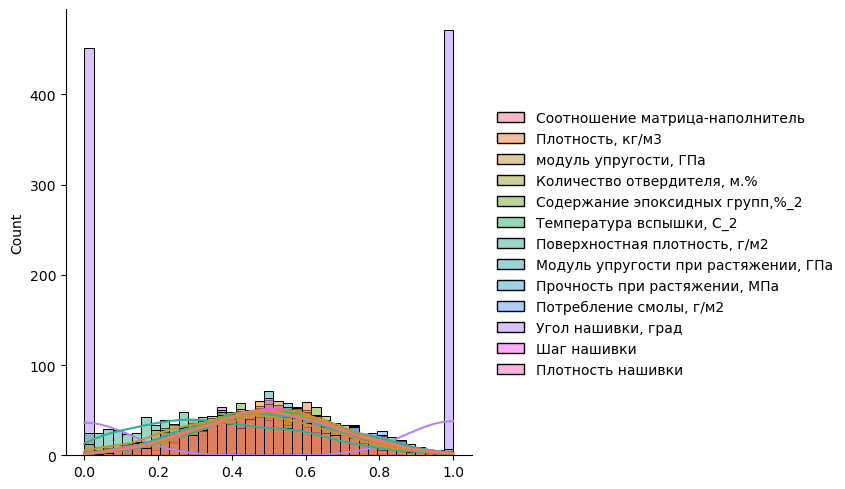

In [ ]:
# pipeline
# Формулирование проблемы (определение цели, оценка текущей ситуации, подготовка плана)
# Сбор данных (сбор, описание, изучение, проверка качества данных)
# Предобработка данных (выборка, очистка, генерация, интеграция, форматирование)
# Проектирование (выбор алгоритмов), разработка, обучение, тестирование (оценка качества модели) - циклично
# Постобработка результатов (оценка результатов, процесса, определение следующих шагов)
# Введение в эксплуатацию (внедрение, планирование мониторинга и поддержки, подготовка отчета, ревью проекта)
# Решение проблемы

In [ ]:
#Структура базового проекта

#README.md файл с инструкцией для запуска и любой важной информацией
#requirements.txt файл, в котором перечислены все необходимые зависимости
#файлы *. py модули программы

#data папка с наборами данных, включающая в себя папки (можно разбить эти папки на train и test):
    # raw сырые данные, то есть данные в том виде, в котором были получены
    # processed данные после различных преобразований (удаление выбросов, заполнение пропусков и т.д.)
    
#models папка с моделями и их параметрами Внутри может быть создана папка logs с логами обучения

#notebooks папка с «тетрадками»:
    #eda [Exploratory Data Analysis (Data Exploration )]исследование данных.
    #poc [Proof of Concept] проверка концепции. Разработка некоторого прототипа или его частей, которые отражают
                            #основную идею. Проверка осуществимости и применимости различных методов
    #modeling построение модели и ее обучение
    #evaluation оценка качества модели

#src (source code) папка с исходным кодом программы, которая может делиться на следующие подпапки:
    #preparation подготовка данных (выгрузка из базы данных, чтение из файла...). Все, что нужно сделать перед обработкой
    #processing обработка данных: чистка, трансформации, преобразования
    #modeling построение модели
            #В данной структуре удобно создавать файлы utils py (для всяких вспомогательных функций), 
                                                    #  train py (для обучения модели),
                                                    #  predict py (для получения предсказаний)

#test папка с тестами (для кода программы, а не модели!)

In [ ]:
# функция для построения графика обучения
def plot_loss(history):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Эпоха')
    plt.ylabel('Точность')
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.legend()
    plt.grid(True)

In [ ]:
# создаем модель нейросети по заданным условиям, смотрим количество оптимизируемых параметров
model = Sequential()
model.add(Dense(128, input_dim = 784, activation="relu"))
model.add(Dense(128, input_dim = 784, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

In [ ]:
# итого параметров 100480+16512+1290 = 118282

# обучение инс 20 эпох (увеличение числа эпох дает очень мало дальнейшего снижения потерь)
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split = 0.2)
plot_loss(history)

In [ ]:
pip freeze > requirements.txt
